In [40]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Clustering
from sklearn.cluster import KMeans

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


## Load the data

In [57]:
data = pd.read_csv("output/vdfsample_20220317_SLURM71721393.csv")

In [58]:
len(data.columns)

210

In [59]:
data.head()

,fileid,cellid,s0_min,s0_max,s0_mean,s0_median,s0_var,s0_skew,s0_kurt,s0_zeros,...,s24_kurt,s24_zeros,mean,zeros,partials,gap,spatial_x,spatial_y,spatial_z,pngfile
0,0,1,0.000178,0.000181,0.000179,0.00018,5.946515e-13,-0.067948,-0.766838,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-149925000.0,0.0,0.0,f0000000c00001.png
1,0,26,0.000178,0.000181,0.000179,0.00018,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-146175000.0,0.0,0.0,f0000000c00026.png
2,0,51,0.000178,0.000181,0.000179,0.00018,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-142425000.0,0.0,0.0,f0000000c00051.png
3,0,76,0.000178,0.000181,0.000179,0.00018,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-138675000.0,0.0,0.0,f0000000c00076.png
4,0,101,0.000178,0.000181,0.000179,0.00018,5.947892e-13,-0.065644,-0.772968,0.0,...,-3.0,1.0,0.000043,0.44,0.04,0,-134925000.0,0.0,0.0,f0000000c00101.png


In [60]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data.iloc[:,2:-4])

## PCA

In [61]:
pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)

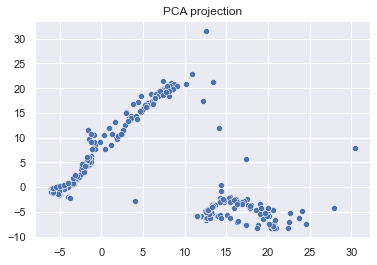

In [62]:
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10), legend = 'full').set(title='PCA projection')
plt.savefig("PCA.png")

## t-SNE

In [63]:
tsne_res = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

In [64]:
tsne_res.shape

(768, 2)

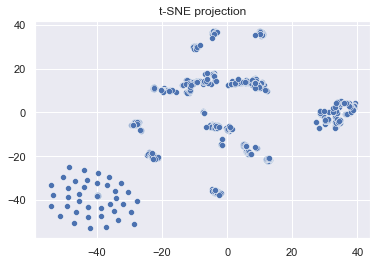

In [65]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], palette = sns.hls_palette(10), legend = 'full').set(title='t-SNE projection')
plt.savefig("tSNE.png")

## UMAP

In [66]:
reducer = umap.UMAP()

In [67]:
umap_res = reducer.fit_transform(X)

In [68]:
umap_res.shape

(768, 2)

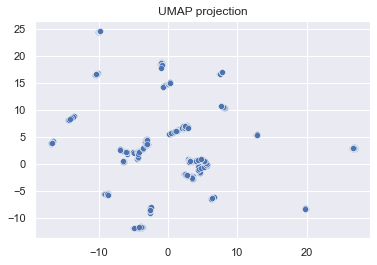

In [69]:
sns.scatterplot(x = umap_res[:,0], y = umap_res[:,1], palette = sns.hls_palette(10), legend = 'full').set(title='UMAP projection')
plt.savefig("UMAP.png")

[Text(0.5, 1.0, 'UMAP')]

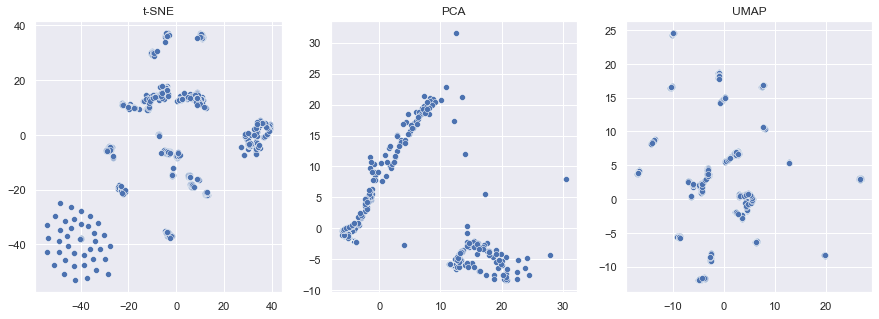

In [70]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x = tsne_res[:,0], y = tsne_res[:,1],palette = sns.hls_palette(10), legend = 'full').set(title='t-SNE')
sns.scatterplot(ax=axes[1], x = pca_res[:,0], y = pca_res[:,1], palette = sns.hls_palette(10), legend = 'full').set(title='PCA')
sns.scatterplot(ax=axes[2], x = umap_res[:,0], y = umap_res[:,1], palette = sns.hls_palette(10), legend = 'full').set(title='UMAP')

## Clustering
Try to cluster using 5 centroids and see if they match what we see in plots.

In [15]:
kmeans = KMeans(n_clusters=10).fit(X)

In [16]:
# data = data.drop('class', axis=1)
data.insert(2, 'class', kmeans.labels_)
data

,fileid,cellid,class,s0_min,s0_max,s0_mean,s0_median,s0_var,s0_skew,s0_kurt,...,s24_kurt,s24_zeros,mean,zeros,partials,gap,spatial_x,spatial_y,spatial_z,pngfile
0,0,1,0,0.000178,0.000181,0.000179,0.000180,5.946515e-13,-0.067948,-0.766838,...,-3.0,1.0,0.000043,0.44,0.04,0,-149925000.0,0.0,0.0,f0000000c00001.png
1,0,26,0,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,...,-3.0,1.0,0.000043,0.44,0.04,0,-146175000.0,0.0,0.0,f0000000c00026.png
2,0,51,0,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,...,-3.0,1.0,0.000043,0.44,0.04,0,-142425000.0,0.0,0.0,f0000000c00051.png
3,0,76,0,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,...,-3.0,1.0,0.000043,0.44,0.04,0,-138675000.0,0.0,0.0,f0000000c00076.png
4,0,101,0,0.000178,0.000181,0.000179,0.000180,5.947892e-13,-0.065644,-0.772968,...,-3.0,1.0,0.000043,0.44,0.04,0,-134925000.0,0.0,0.0,f0000000c00101.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,15,1076,3,0.000347,0.000564,0.000447,0.000448,2.351546e-09,0.209591,-0.625858,...,-3.0,1.0,0.000024,0.40,0.44,1,11325000.0,0.0,0.0,f0000015c01076.png
764,15,1101,3,0.000346,0.000565,0.000447,0.000446,2.349635e-09,0.207436,-0.601140,...,-3.0,1.0,0.000024,0.36,0.48,1,15075000.0,0.0,0.0,f0000015c01101.png
765,15,1126,9,0.000348,0.000567,0.000447,0.000447,2.388199e-09,0.206718,-0.612593,...,-3.0,1.0,0.000024,0.32,0.52,1,18825000.0,0.0,0.0,f0000015c01126.png
766,15,1151,9,0.000347,0.000568,0.000448,0.000449,2.345123e-09,0.177765,-0.628368,...,-3.0,1.0,0.000024,0.36,0.48,1,22575000.0,0.0,0.0,f0000015c01151.png


[Text(0.5, 1.0, 'UMAP projection')]

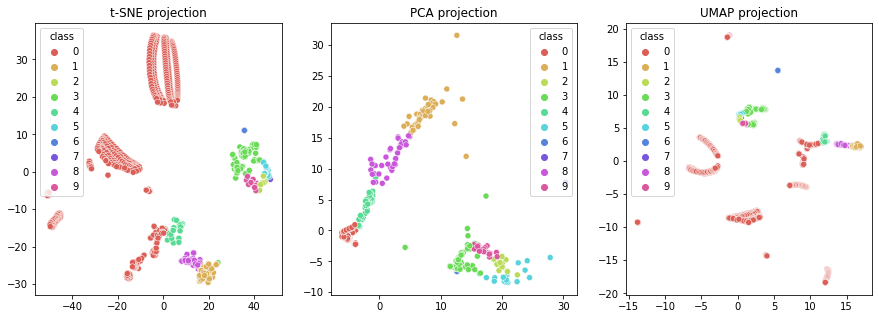

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x = tsne_res[:,0], y = tsne_res[:,1], hue = data["class"],palette = sns.hls_palette(10), legend = 'full').set(title='t-SNE projection')
sns.scatterplot(ax=axes[1], x = pca_res[:,0], y = pca_res[:,1], hue = data["class"], palette = sns.hls_palette(10), legend = 'full').set(title='PCA projection')
sns.scatterplot(ax=axes[2], x = umap_res[:,0], y = umap_res[:,1], hue = data["class"], palette = sns.hls_palette(10), legend = 'full').set(title='UMAP projection')

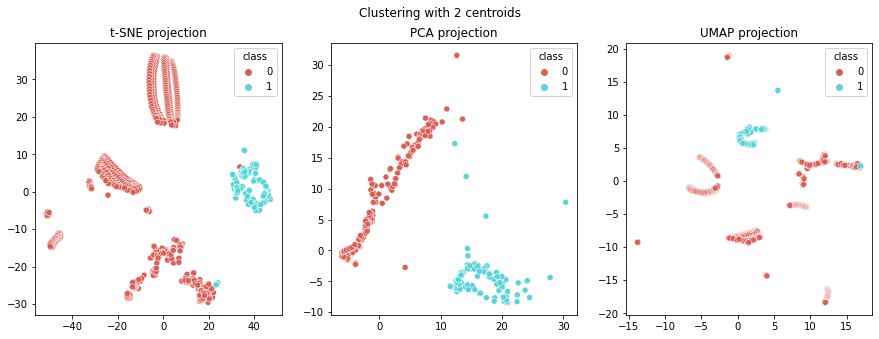

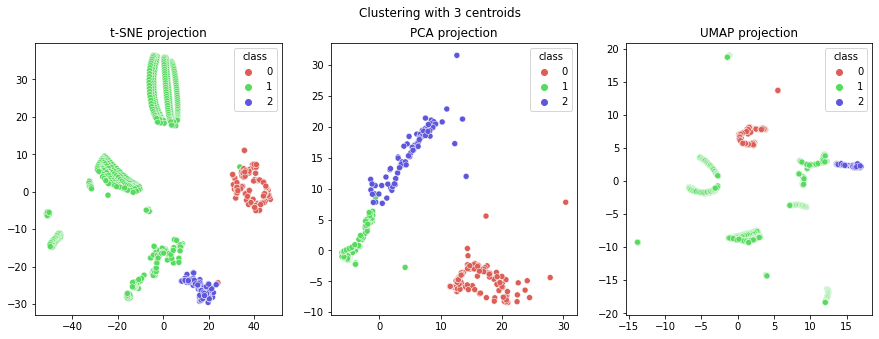

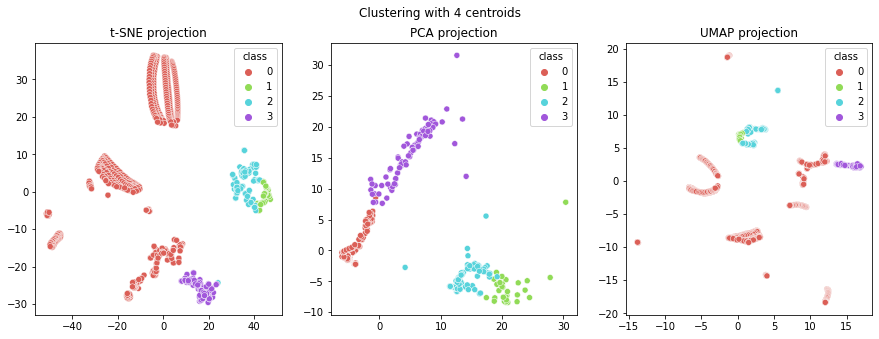

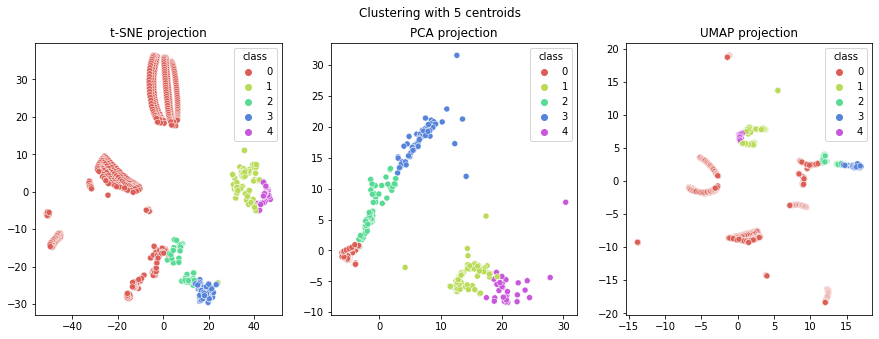

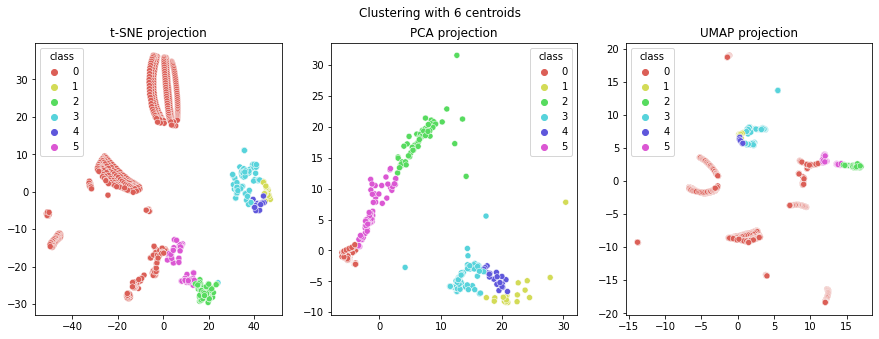

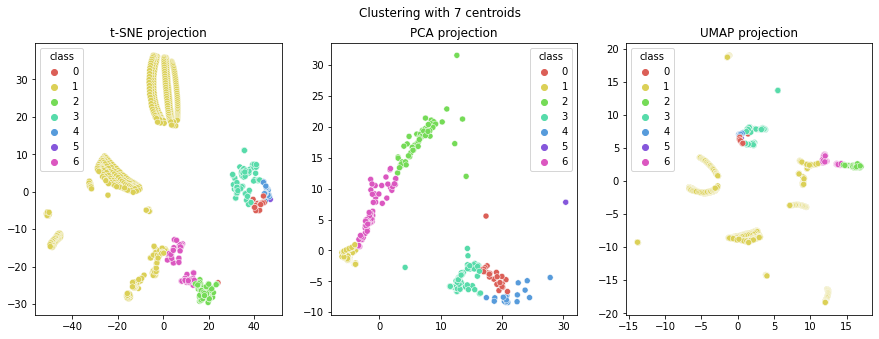

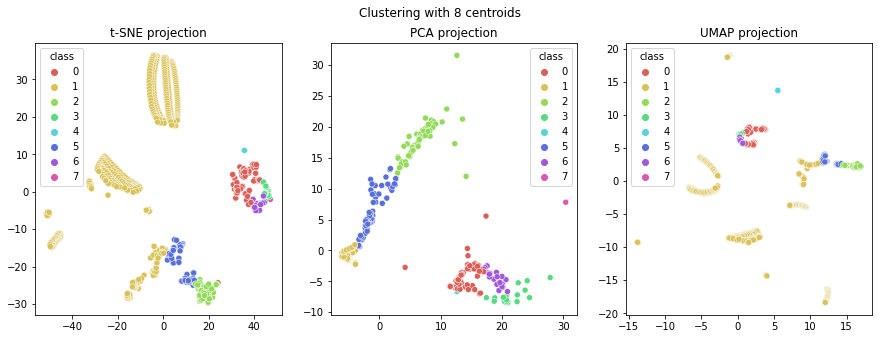

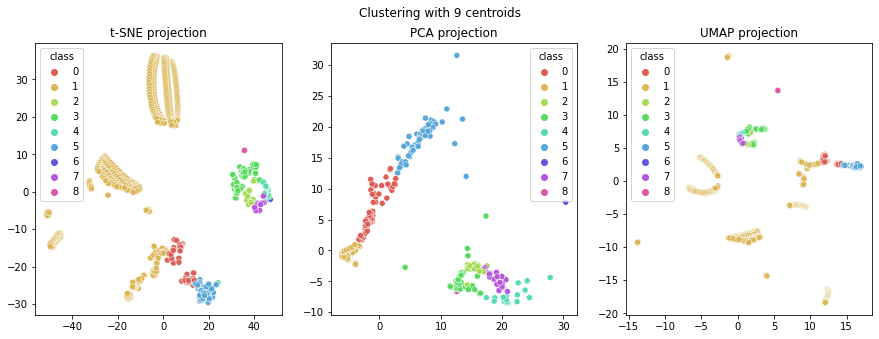

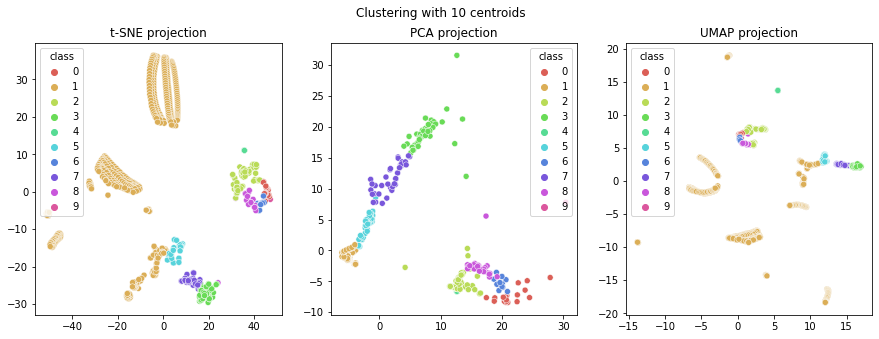

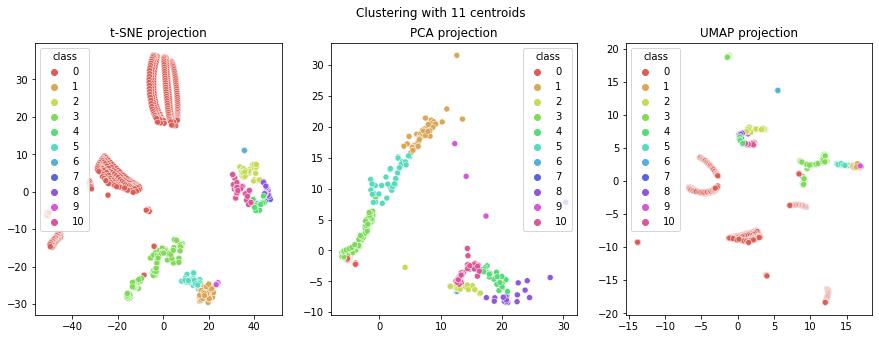

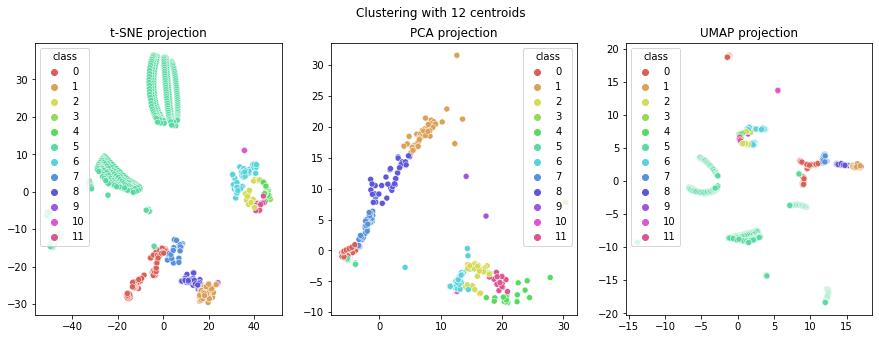

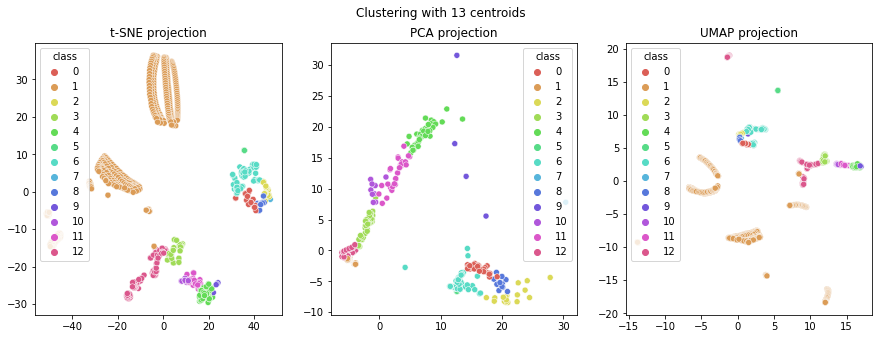

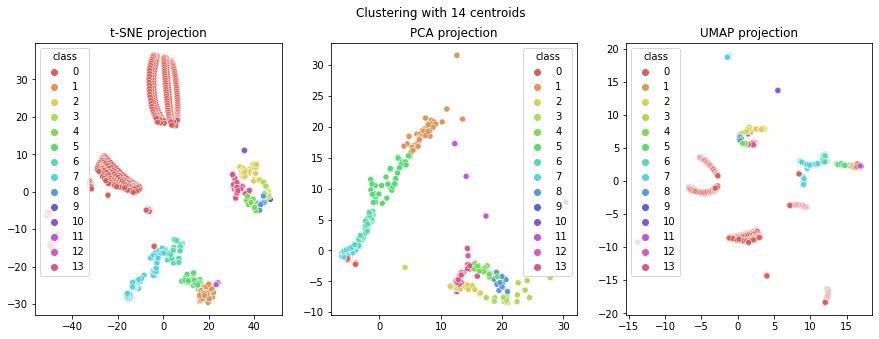

In [18]:
for n_clusters in range(2,15):
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    data = data.drop('class', axis=1)
    data.insert(2, 'class', kmeans.labels_)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Clustering with {n_clusters} centroids")
    sns.scatterplot(ax=axes[0], x = tsne_res[:,0], y = tsne_res[:,1], hue = data["class"],palette = sns.hls_palette(n_clusters), legend = 'full').set(title='t-SNE projection')
    sns.scatterplot(ax=axes[1], x = pca_res[:,0], y = pca_res[:,1], hue = data["class"], palette = sns.hls_palette(n_clusters), legend = 'full').set(title='PCA projection')
    sns.scatterplot(ax=axes[2], x = umap_res[:,0], y = umap_res[:,1], hue = data["class"], palette = sns.hls_palette(n_clusters), legend = 'full').set(title='UMAP projection')

### With selected features

In [19]:
cols = ['gap', 'mean', 'zeros', 'partials']
data_subset = data[cols].values

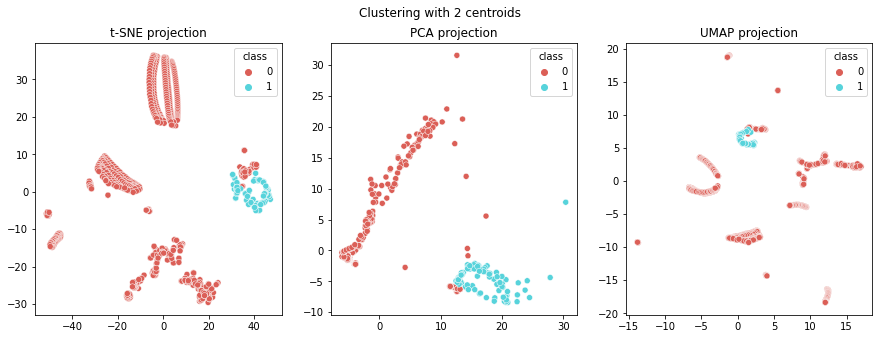

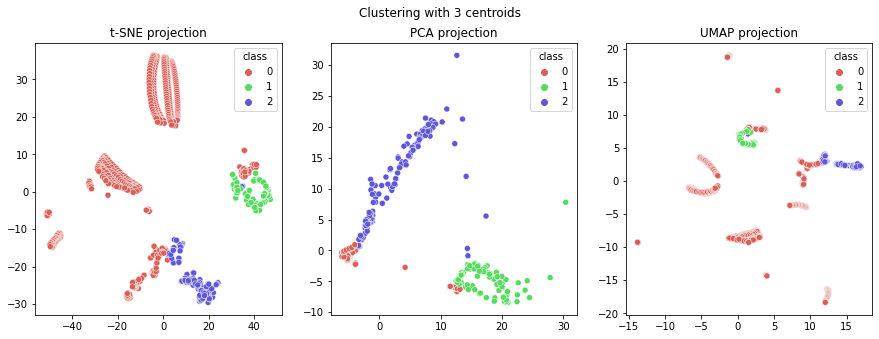

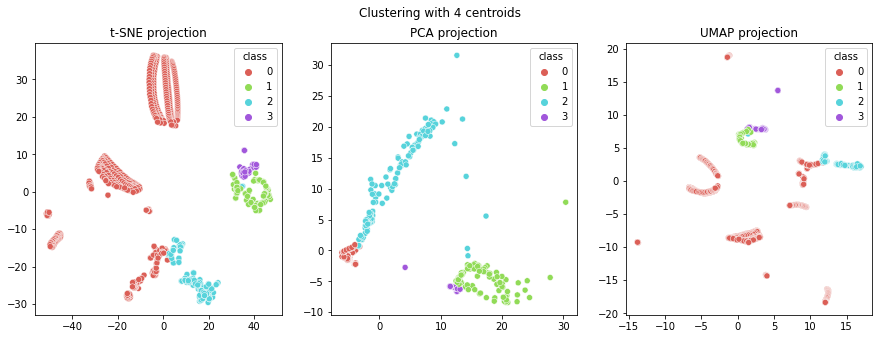

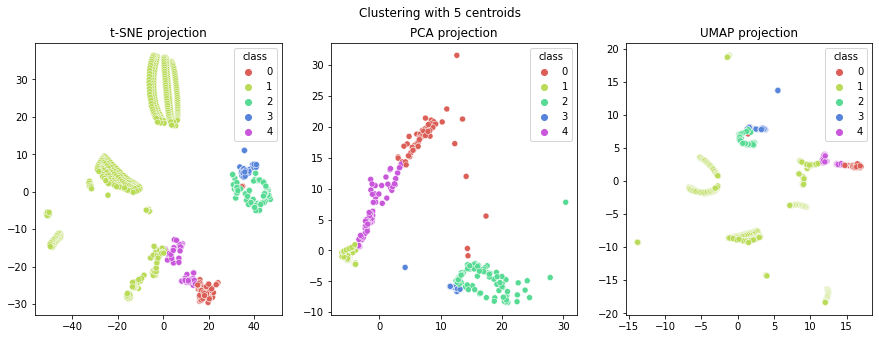

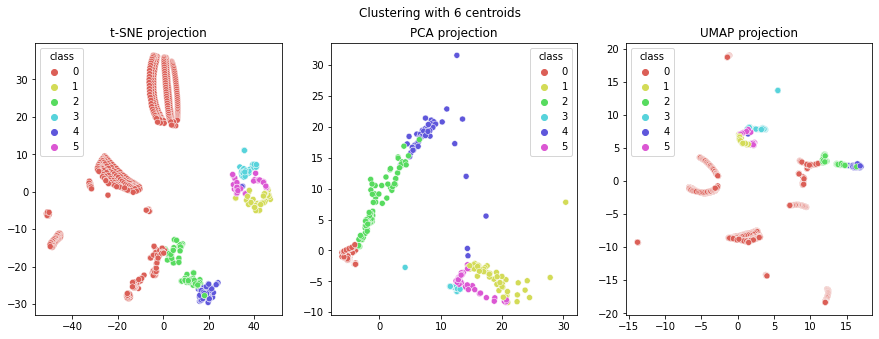

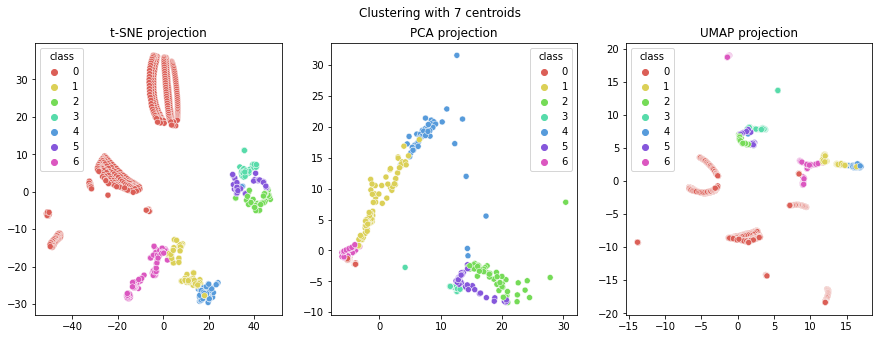

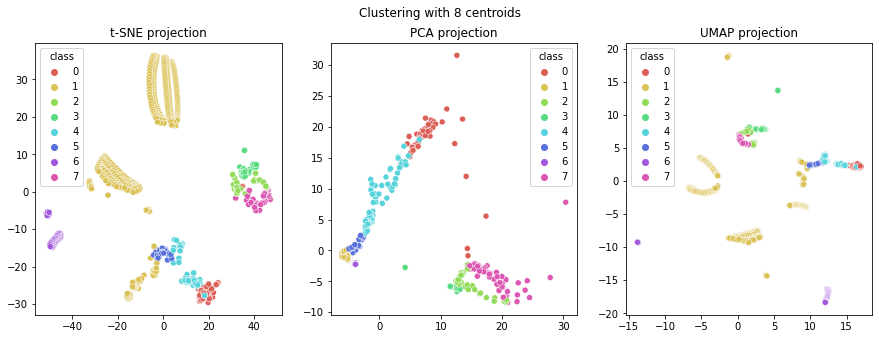

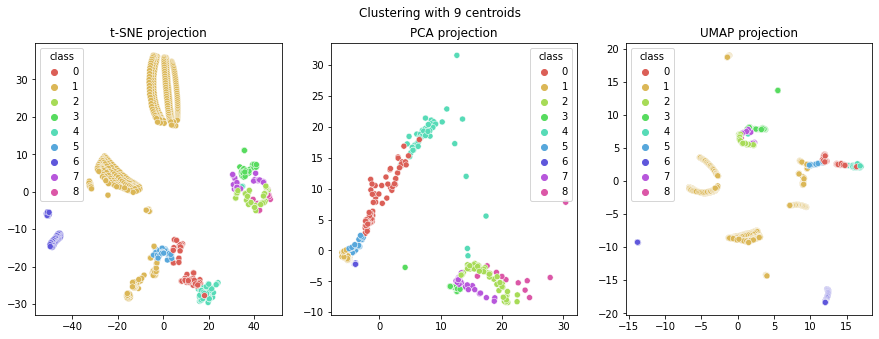

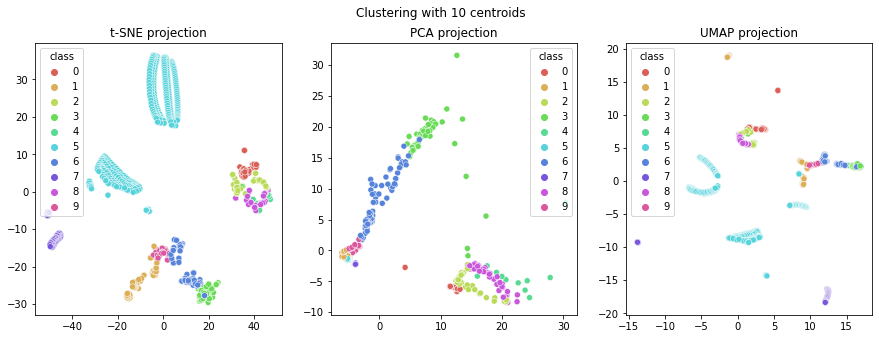

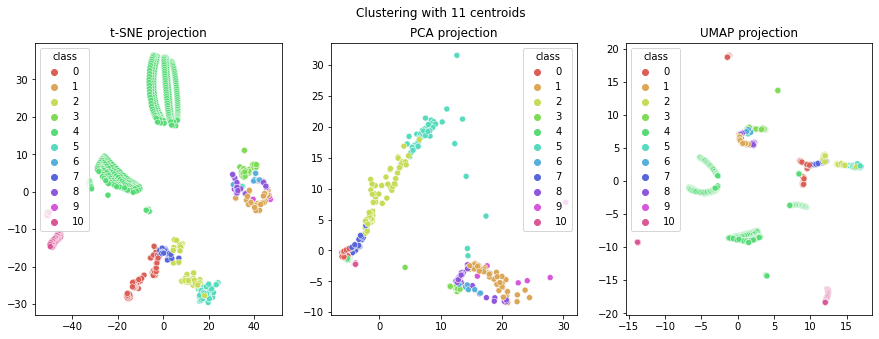

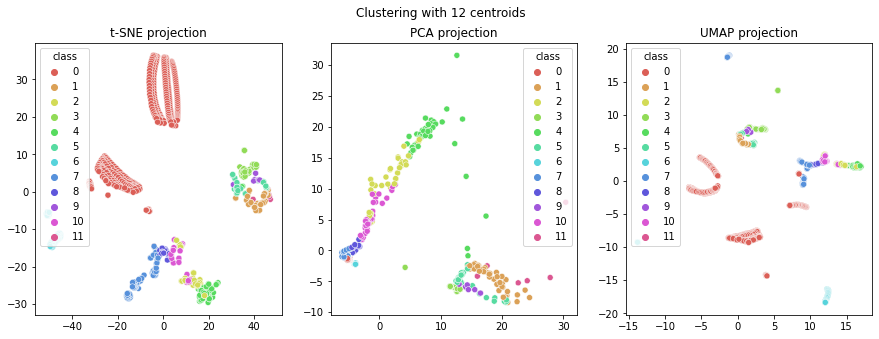

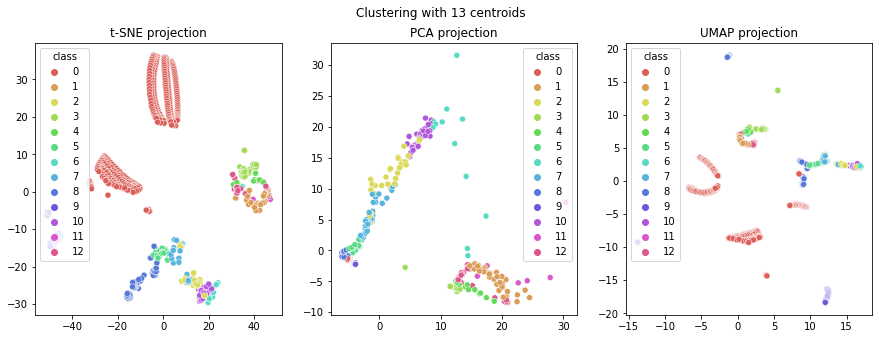

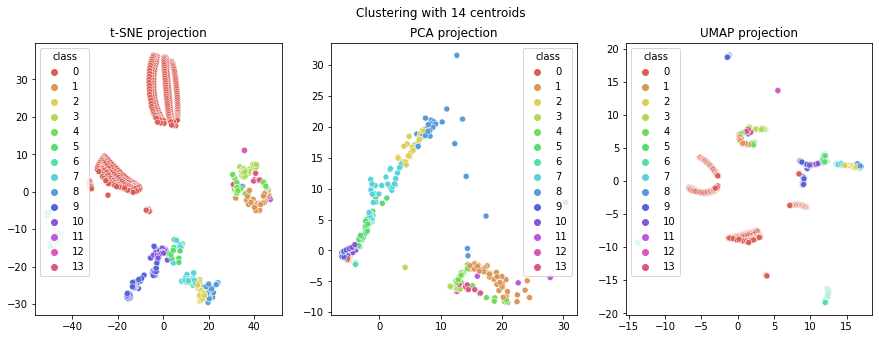

In [20]:
for n_clusters in range(2,15):
    kmeans = KMeans(n_clusters=n_clusters).fit(data_subset)
    data = data.drop('class', axis=1)
    data.insert(2, 'class', kmeans.labels_)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Clustering with {n_clusters} centroids")
    sns.scatterplot(ax=axes[0], x = tsne_res[:,0], y = tsne_res[:,1], hue = data["class"],palette = sns.hls_palette(n_clusters), legend = 'full').set(title='t-SNE projection')
    sns.scatterplot(ax=axes[1], x = pca_res[:,0], y = pca_res[:,1], hue = data["class"], palette = sns.hls_palette(n_clusters), legend = 'full').set(title='PCA projection')
    sns.scatterplot(ax=axes[2], x = umap_res[:,0], y = umap_res[:,1], hue = data["class"], palette = sns.hls_palette(n_clusters), legend = 'full').set(title='UMAP projection')

In [21]:
pca = PCA(n_components=10)
pca_features = pca.fit_transform(X)

In [22]:
pca_features.shape

(768, 10)

[Text(0.5, 1.0, 'UMAP projection')]

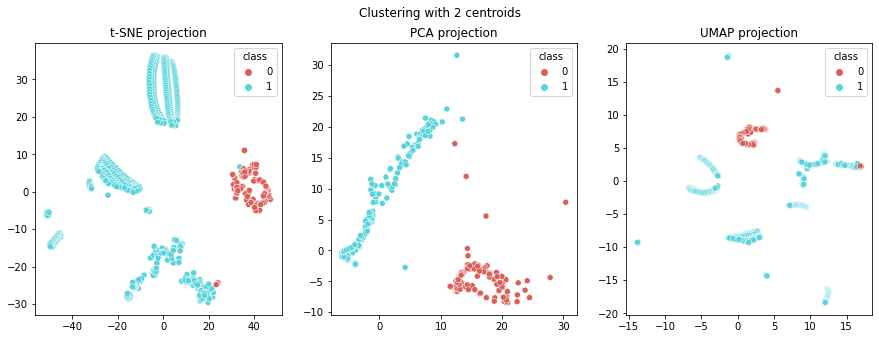

In [23]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters).fit(X)
data = data.drop('class', axis=1)
data.insert(2, 'class', kmeans.labels_)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f"Clustering with {n_clusters} centroids")
sns.scatterplot(ax=axes[0], x = tsne_res[:,0], y = tsne_res[:,1], hue = data["class"],palette = sns.hls_palette(n_clusters), legend = 'full').set(title='t-SNE projection')
sns.scatterplot(ax=axes[1], x = pca_res[:,0], y = pca_res[:,1], hue = data["class"], palette = sns.hls_palette(n_clusters), legend = 'full').set(title='PCA projection')
sns.scatterplot(ax=axes[2], x = umap_res[:,0], y = umap_res[:,1], hue = data["class"], palette = sns.hls_palette(n_clusters), legend = 'full').set(title='UMAP projection')

In [24]:
pca = PCA()
pca_res = pca.fit_transform(X)

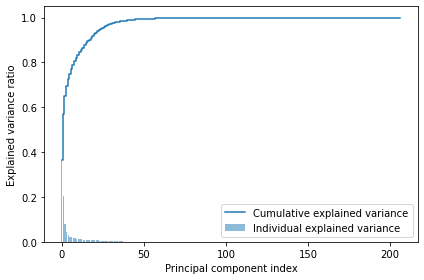

In [25]:
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## t-SNE with 2d

In [26]:
data = pd.read_csv("output/2D_magnetosphere.csv")

In [27]:
X = StandardScaler().fit_transform(data.iloc[:,2:-4])

In [28]:
tsne_res = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

In [29]:
tsne_res.shape

(2871, 2)

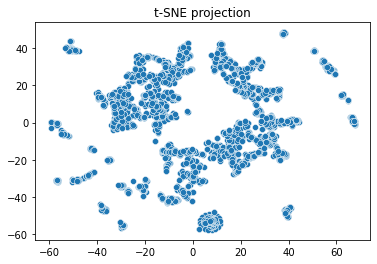

In [30]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], palette = sns.hls_palette(10), legend = 'full').set(title='t-SNE projection')
plt.savefig("tSNE.png")

In [31]:
data.iloc[:,2:-4]

,s0_min,s0_max,s0_mean,s0_median,s0_var,s0_skew,s0_kurt,s0_zeros,s1_min,s1_max,...,s24_mean,s24_median,s24_var,s24_skew,s24_kurt,s24_zeros,mean,zeros,partials,gap
0,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,0.000068,0.000253,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.76,0.08,0
1,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,0.000068,0.000253,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.76,0.08,0
2,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,0.000068,0.000253,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.76,0.08,0
3,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,0.000068,0.000253,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.76,0.08,0
4,0.000338,0.000562,0.000445,0.000452,2.867838e-09,0.080865,-0.931964,0.0,0.000068,0.000253,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.76,0.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866,0.000339,0.000552,0.000443,0.000451,2.505199e-09,0.045649,-0.851638,0.0,0.000069,0.000246,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.72,0.12,0
2867,0.000339,0.000554,0.000443,0.000449,2.563533e-09,0.074711,-0.858616,0.0,0.000069,0.000244,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.72,0.12,0
2868,0.000340,0.000557,0.000443,0.000450,2.640488e-09,0.102424,-0.867795,0.0,0.000070,0.000243,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.76,0.08,0
2869,0.000344,0.000559,0.000443,0.000451,2.631603e-09,0.044335,-1.018587,0.0,0.000069,0.000253,...,0.0,0.0,0.0,0.0,-3.0,1.0,0.000024,0.72,0.12,0


In [32]:
cols = ['gap', 'mean', 'zeros', 'partials']
data_subset = data[cols].values

In [33]:
X = StandardScaler().fit_transform(data[cols].values)

In [34]:
tsne_res = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

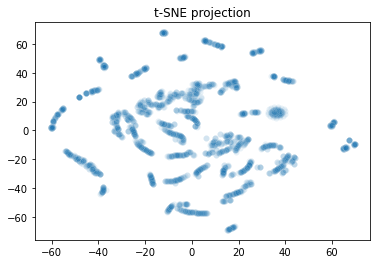

In [35]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], palette = sns.hls_palette(10), legend = 'full', alpha=0.1).set(title='t-SNE projection')
plt.savefig("tSNE.png")

Try different clustering algorithms dbscan, gaussian mixture and see if I can get the same plots as Simo